In [1]:
#I highly recommend modifying the python environment to be compatible with this code before running it according to NN_py310.yaml. 
#This notebook already contains the output. If you want to re-run it, it may take about 9 hours.#

In [ ]:
import os
os.environ["MKL_NUM_THREADS"] = "2"
os.environ["NUMEXPR_NUM_THREADS"] = "2"
os.environ["OMP_NUM_THREADS"] = "2"

In [2]:
import pandas as pd
import numpy as np

file_path = 'CarsData.csv'
data = pd.read_csv(file_path)

print(data.head())

print(data.info())

print(data.describe())

           model  year  price transmission  mileage fuelType  tax   mpg  \
0            I10  2017   7495       Manual    11630   Petrol  145  60.1   
1           Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2       2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3   Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4         Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   

   engineSize Manufacturer  
0         1.0       hyundi  
1         1.0   volkswagen  
2         2.0          BMW  
3         2.0        skoda  
4         1.2         ford  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mil

In [3]:
print(data.isnull().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64


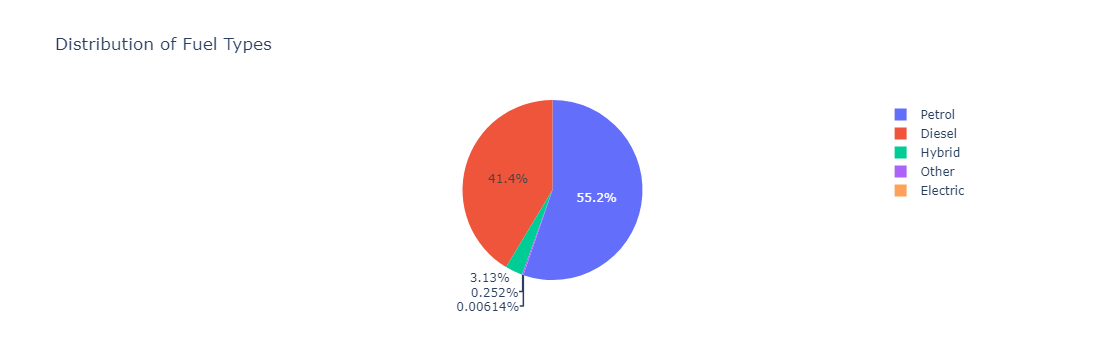

In [4]:
import plotly.express as px
fuel_type_counts = data["fuelType"].value_counts().reset_index()
fig = px.pie(fuel_type_counts, values='count', names='fuelType', title='Distribution of Fuel Types')
fig.show()

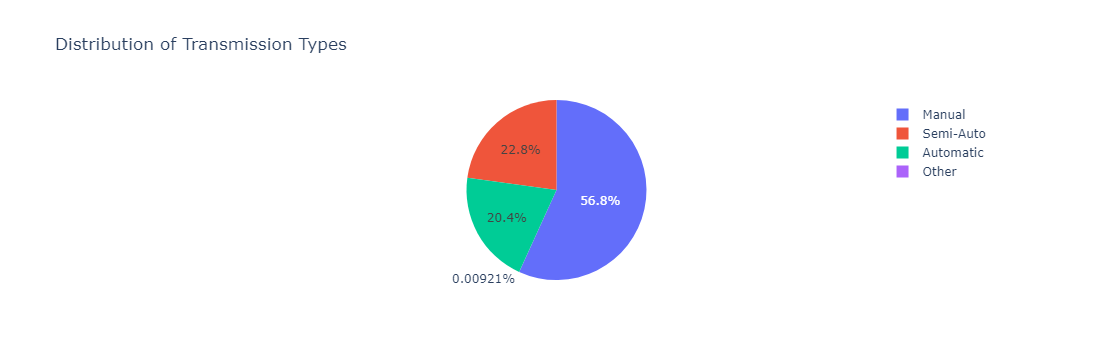

In [5]:
transmission_type_counts = data["transmission"].value_counts().reset_index()
fig = px.pie(transmission_type_counts, values='count', names='transmission', title='Distribution of Transmission Types')
fig.show()

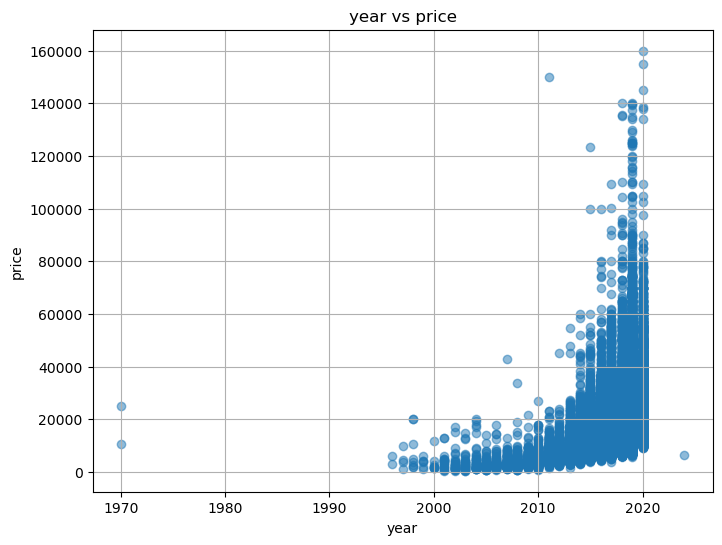

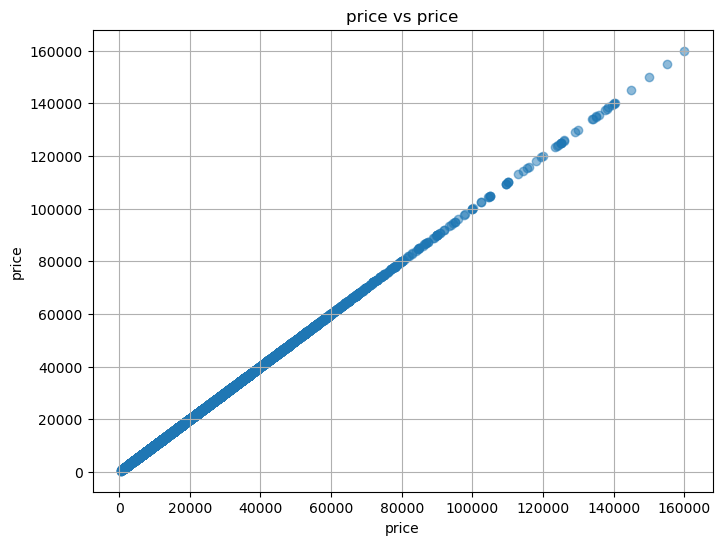

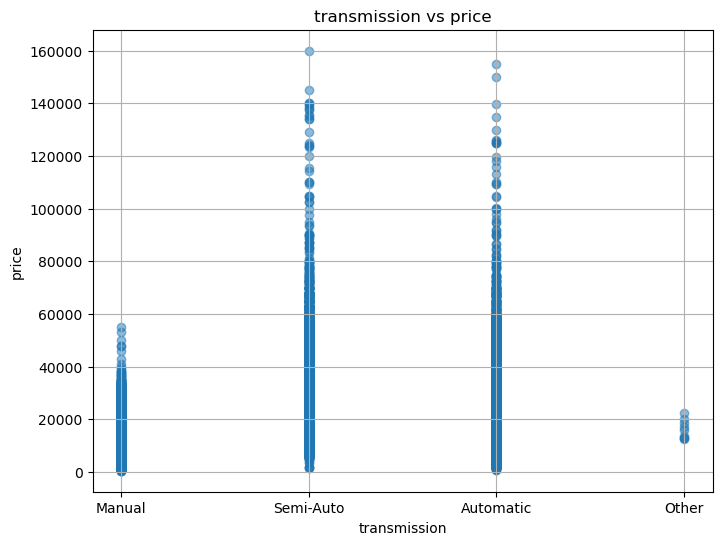

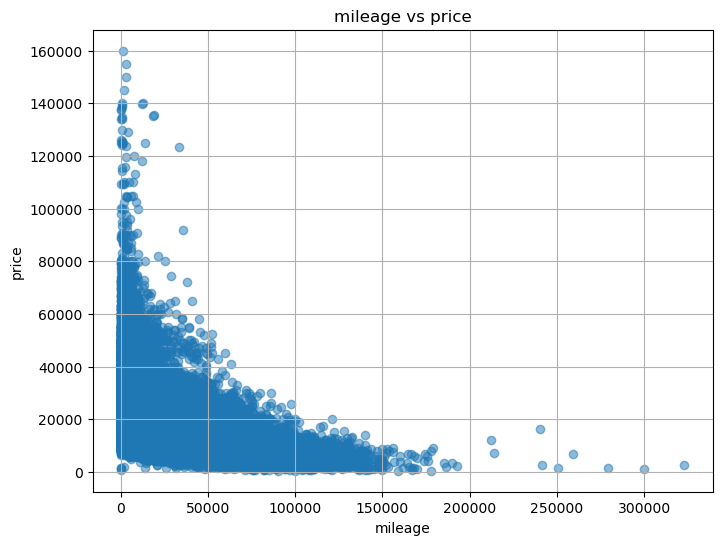

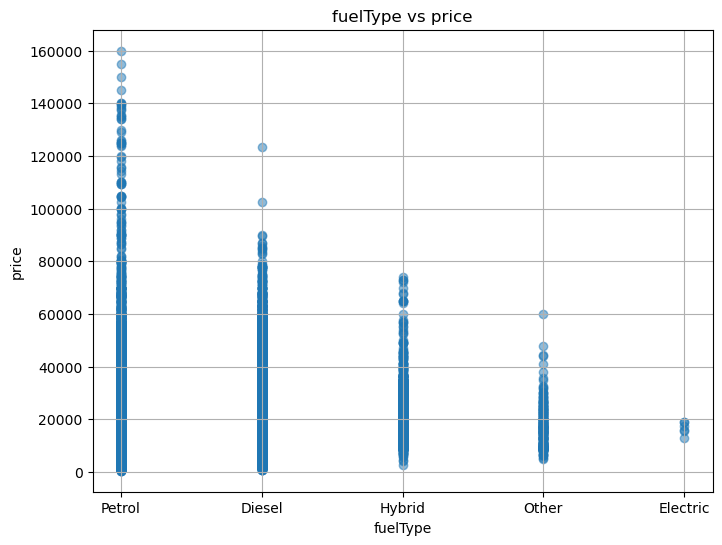

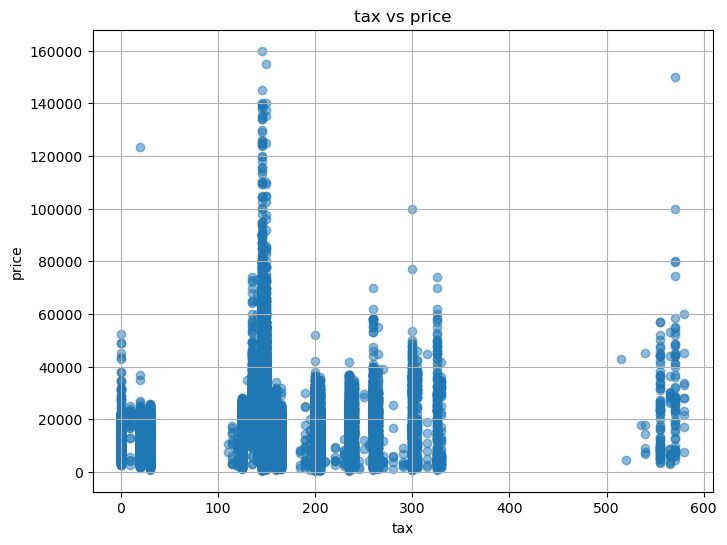

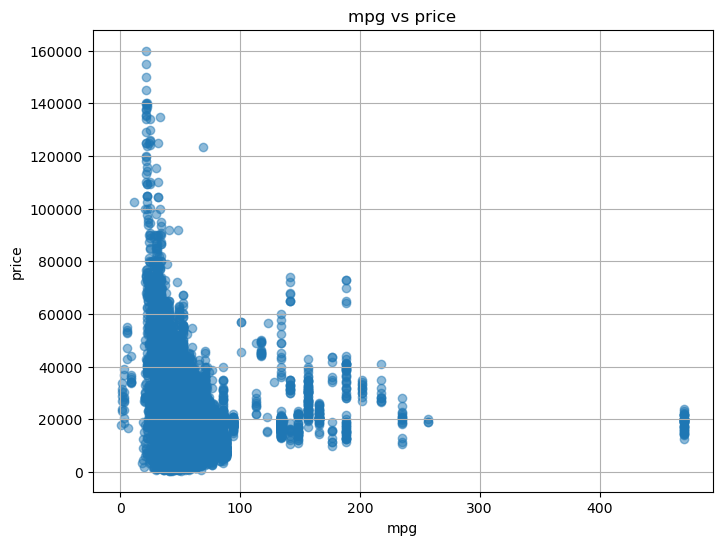

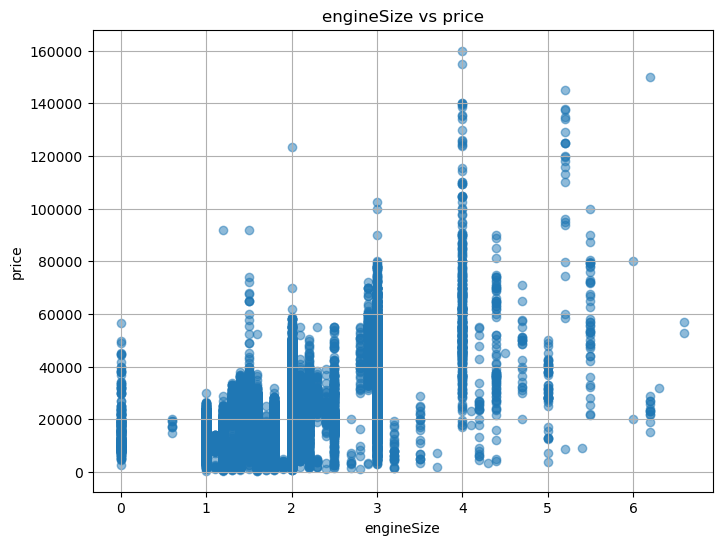

In [5]:
import matplotlib.pyplot as plt # plots

for label in data.columns[1:-1]:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[label], data['price'], alpha=0.5)
    plt.xlabel(label)
    plt.ylabel('price')
    plt.title(label + ' vs price')
    plt.grid(True)
    plt.show()

In [6]:
data = pd.get_dummies(data, columns=['transmission', 'fuelType'])

df = pd.DataFrame(data)
df['age'] = 2024 - df['year']
df.drop('year', axis=1, inplace=True)


df = df[(df['mpg'] >= 10) & (df['mpg'] <= 120)]

df = df[(df['engineSize'] >= 0.6) & (df['engineSize'] <= 6.5)]
model_mean_prices = df.groupby('model')['price'].mean()
df['model_mean_price'] = df['model'].map(model_mean_prices)
manufacturer_mean_prices = df.groupby('Manufacturer')['price'].mean()
df['manufacturer_mean_price'] = df['Manufacturer'].map(manufacturer_mean_prices)



df.head()

model  price  mileage  tax   mpg  engineSize Manufacturer  \
0            I10   7495    11630  145  60.1         1.0       hyundi   
1           Polo  10989     9200  145  58.9         1.0   volkswagen   
2       2 Series  27990     1614  145  49.6         2.0          BMW   
3   Yeti Outdoor  12495    30960  150  62.8         2.0        skoda   
4         Fiesta   7999    19353  125  54.3         1.2         ford   

   transmission_Automatic  transmission_Manual  transmission_Other  \
0                   False                 True               False   
1                   False                 True               False   
2                   False                False               False   
3                   False                 True               False   
4                   False                 True               False   

   transmission_Semi-Auto  fuelType_Diesel  fuelType_Electric  \
0                   False            False              False   
1                   False            False              False   
2                    True             True              False   
3                   False             True              False   
4                   False            False              False   

   fuelType_Hybrid  fuelType_Other  fuelType_Petrol  age  model_mean_price  \
0            False           False             True    7       7723.844828   
1            False           False             True    7      11318.725647   
2            False           False            False    5      19475.275952   
3            False           False            False    7      12756.576497   
4            False           False             True    7      10188.944684   

   manufacturer_mean_price  
0             12737.842585  
1             16781.011433  
2             22633.861847  
3             14237.014112  
4             12265.555449

In [7]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['mileage', 'tax', 'mpg', 'engineSize', 'age']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

model  price   mileage       tax       mpg  engineSize  \
0            I10   7495 -0.549652  0.389234  0.491594   -1.209581   
1           Polo  10989 -0.665127  0.389234  0.385848   -1.209581   
2       2 Series  27990 -1.025618  0.389234 -0.433683    0.599311   
3   Yeti Outdoor  12495  0.368921  0.468351  0.729523    0.599311   
4         Fiesta   7999 -0.182650  0.072765 -0.019511   -0.847802   

  Manufacturer  transmission_Automatic  transmission_Manual  \
0       hyundi                   False                 True   
1   volkswagen                   False                 True   
2          BMW                   False                False   
3        skoda                   False                 True   
4         ford                   False                 True   

   transmission_Other  transmission_Semi-Auto  fuelType_Diesel  \
0               False                   False            False   
1               False                   False            False   
2               False                    True             True   
3               False                   False             True   
4               False                   False            False   

   fuelType_Electric  fuelType_Hybrid  fuelType_Other  fuelType_Petrol  \
0              False            False           False             True   
1              False            False           False             True   
2              False            False           False            False   
3              False            False           False            False   
4              False            False           False             True   

        age  model_mean_price  manufacturer_mean_price  
0  0.030712       7723.844828             12737.842585  
1  0.030712      11318.725647             16781.011433  
2 -0.914568      19475.275952             22633.861847  
3  0.030712      12756.576497             14237.014112  
4  0.030712      10188.944684             12265.555449

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(input_dim, hidden_layers, activation, dropout_rate=0.0):
    model = Sequential()
    for i, nodes in enumerate(hidden_layers):
        if i == 0:
            model.add(Dense(nodes, activation=activation, input_dim=input_dim))
        else:
            model.add(Dense(nodes, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    return model

def train_model(model, X_train, y_train, X_val, y_val, learning_rate=0.001, epochs=100, batch_size=32):
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=epochs, batch_size=batch_size, verbose=0)
    return history

import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


In [9]:

from sklearn.model_selection import GridSearchCV, train_test_split
X = df.drop(['price', 'model', 'Manufacturer'], axis=1)

y = df['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
input_dim = X_train.shape[1]  
hidden_layers = [64, 64] 
activation = 'relu'
dropout_rate = 0.1  
learning_rate = 0.001
epochs = 1000
batch_size = 32

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_val = X_val.astype('float32')
y_val = y_val.astype('float32')


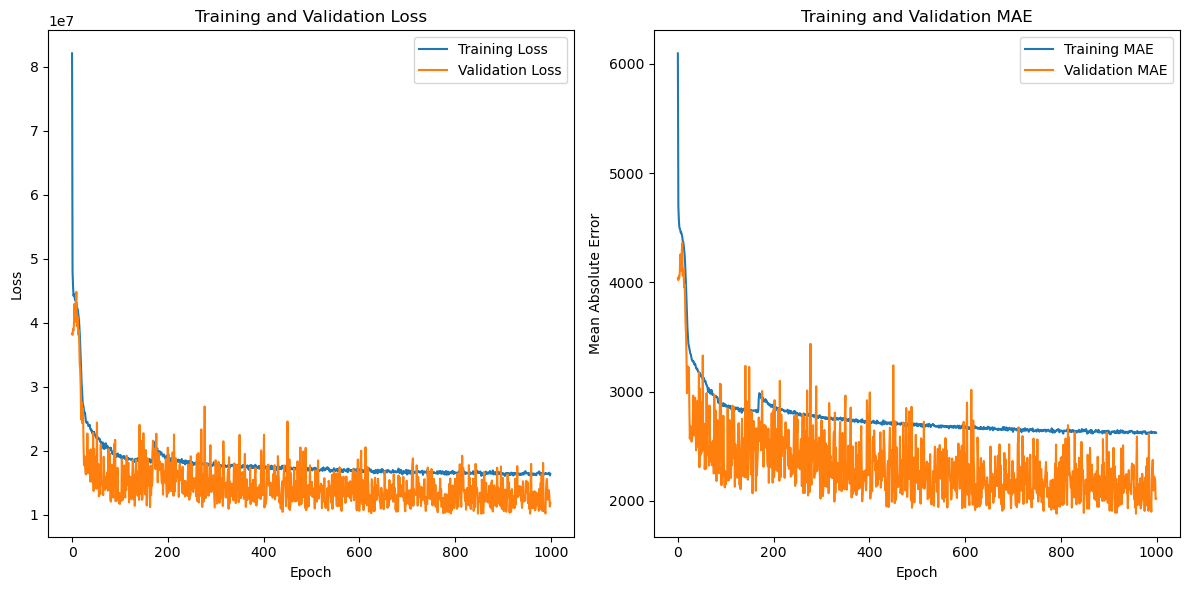

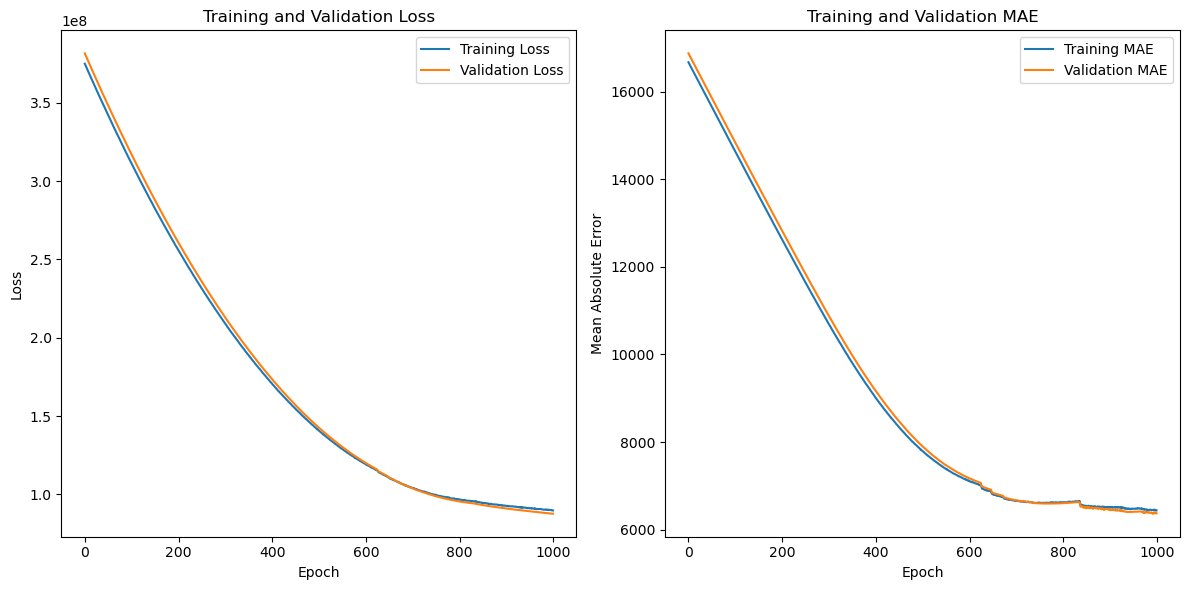

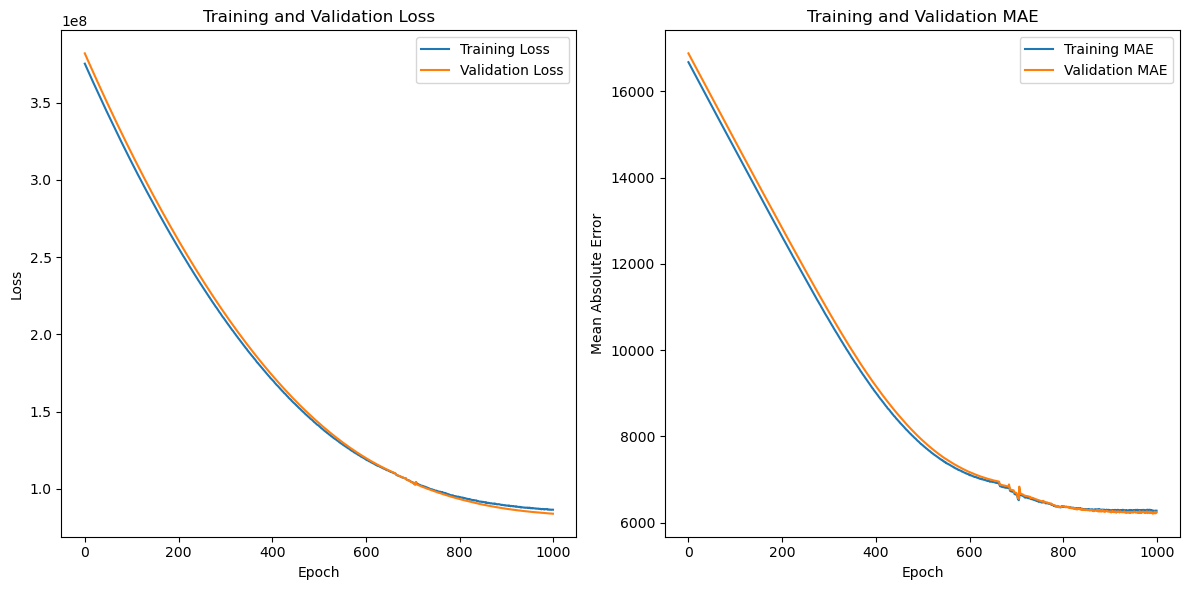

In [12]:
configurations_activation = [
    {'hidden_layers': [16, 16], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.0005, 'batch_size': 32},
    {'hidden_layers': [16, 16], 'activation': 'tanh', 'dropout_rate': 0.1, 'learning_rate': 0.0005, 'batch_size': 32},
    {'hidden_layers': [16, 16], 'activation': 'sigmoid', 'dropout_rate': 0.1, 'learning_rate': 0.0005, 'batch_size': 32}
]

for config in configurations_activation:
    model = build_model(input_dim, config['hidden_layers'], config['activation'], config['dropout_rate'])
    history = train_model(model, X_train, y_train, X_val, y_val, config['learning_rate'], 1000, config['batch_size'])
    plot_training_history(history)

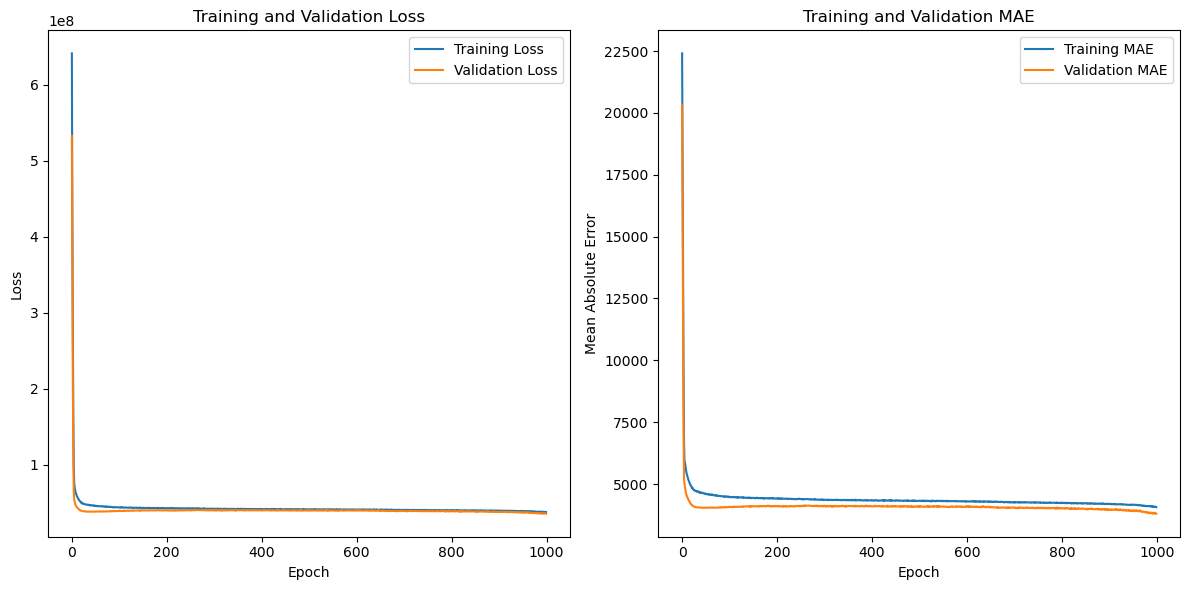

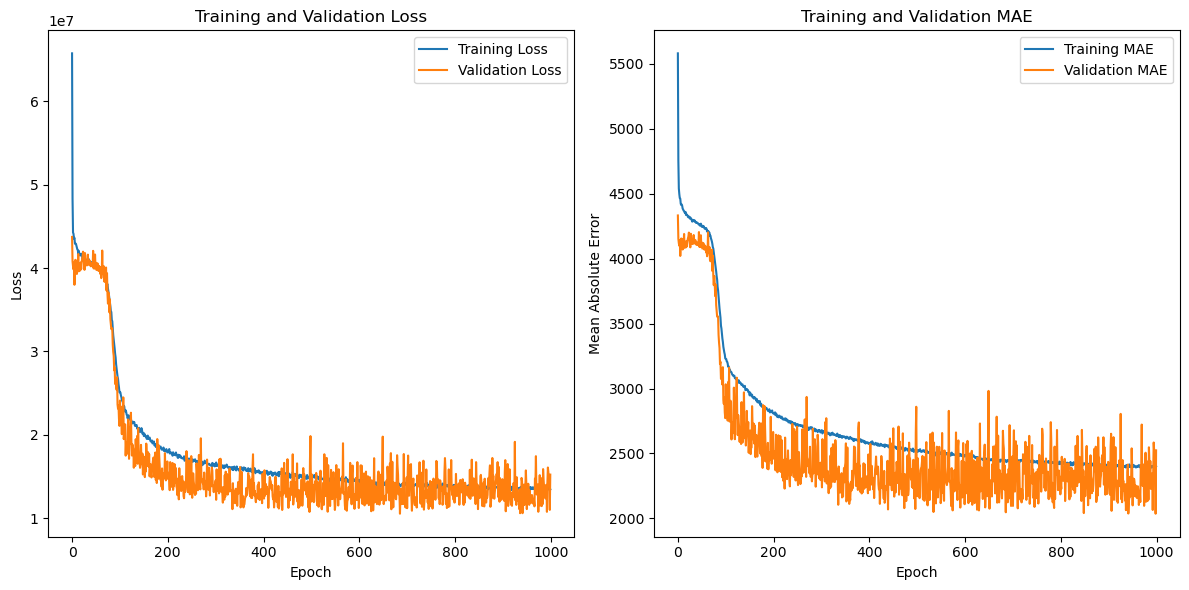

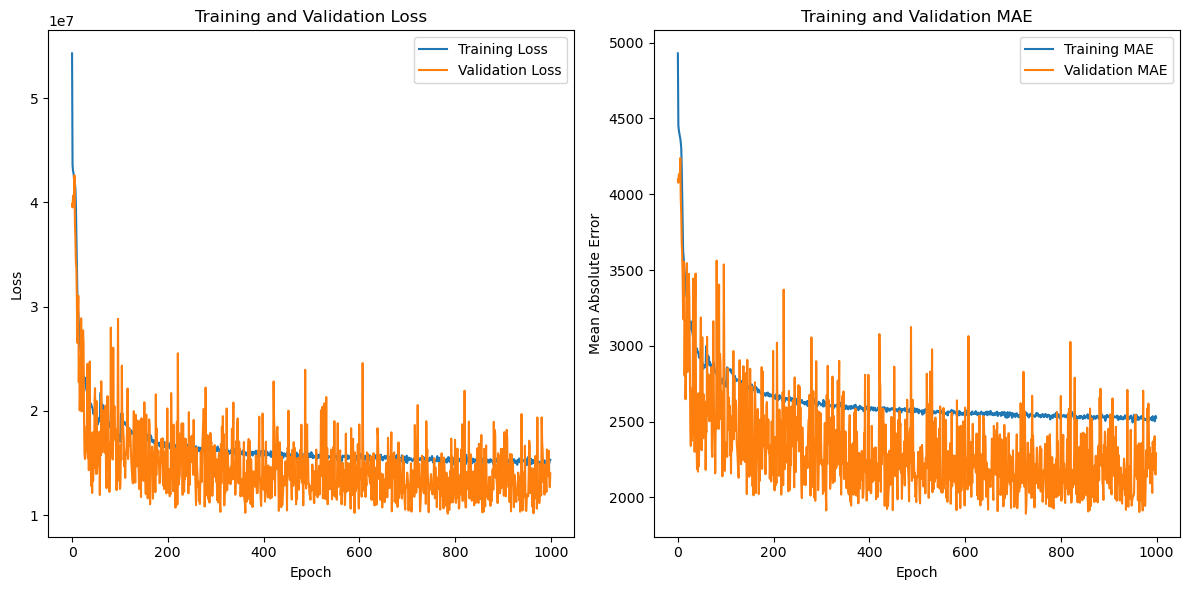

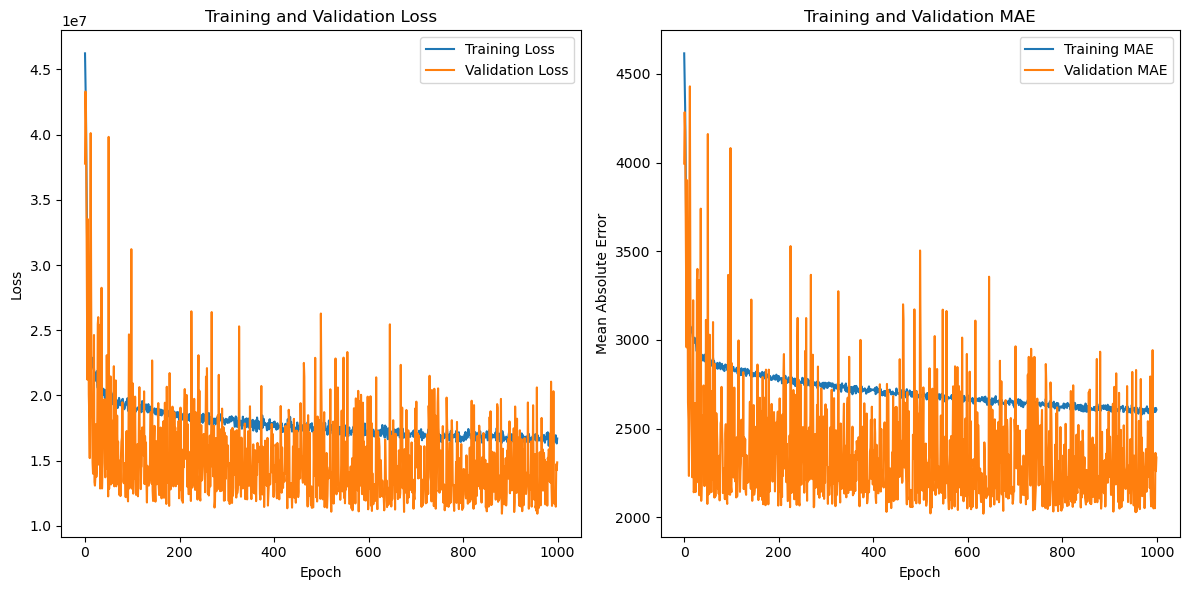

In [9]:
configurations_learning_rate = [
    {'hidden_layers': [16, 16], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.00001, 'batch_size': 32},
    {'hidden_layers': [16, 16], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.0001, 'batch_size': 32},
    {'hidden_layers': [16, 16], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 32},
    {'hidden_layers': [16, 16], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.01, 'batch_size': 32}
]

for config in configurations_learning_rate:
    model = build_model(input_dim, config['hidden_layers'], config['activation'], config['dropout_rate'])
    history = train_model(model, X_train, y_train, X_val, y_val, config['learning_rate'], epochs, config['batch_size'])
    plot_training_history(history)

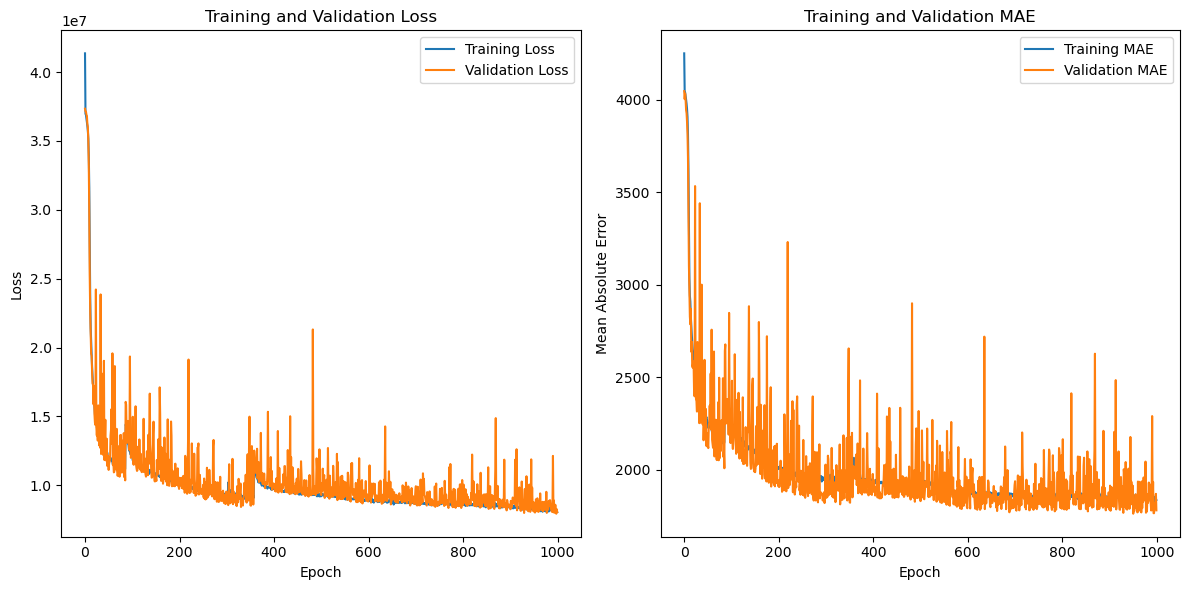

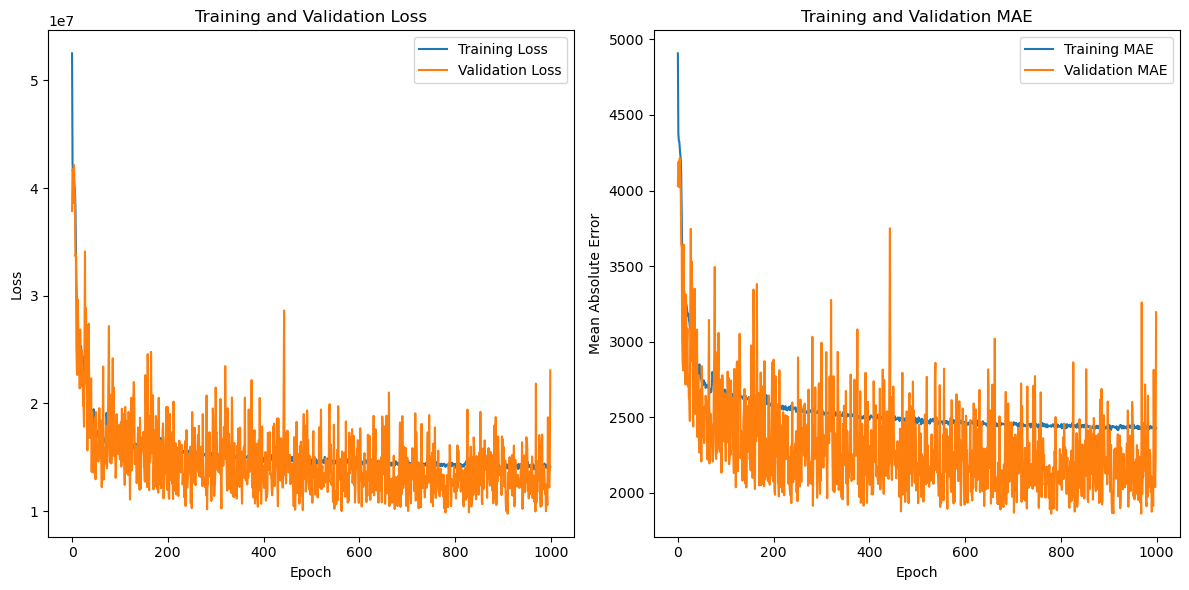

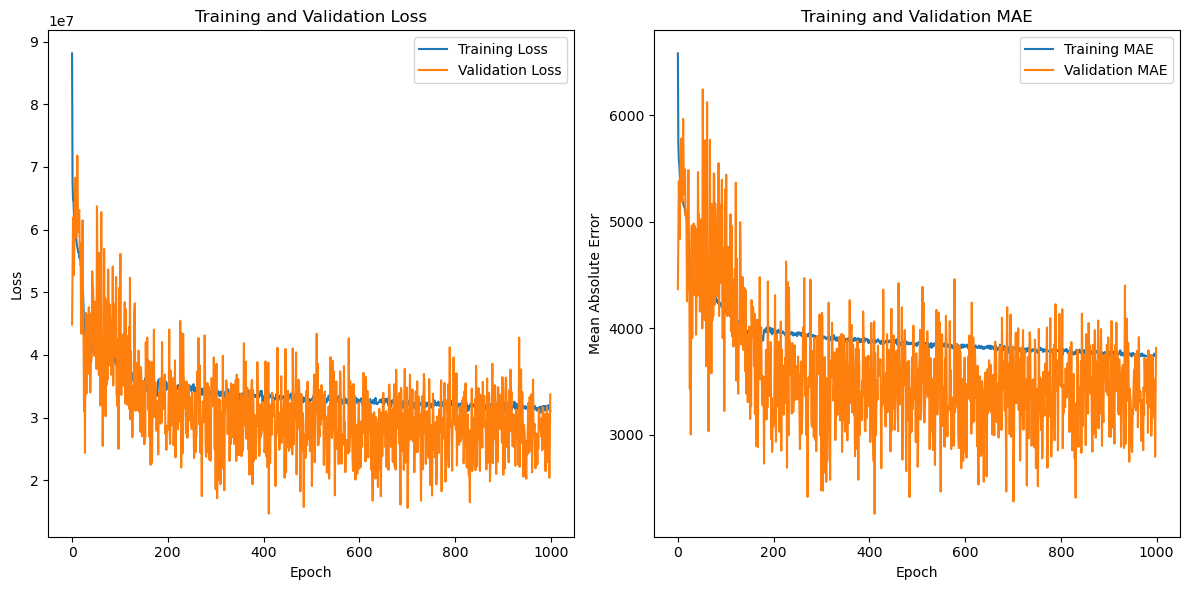

In [10]:
configurations_dropout = [
    {'hidden_layers': [16, 16], 'activation': 'relu', 'learning_rate': 0.001, 'dropout_rate': 0.0, 'batch_size': 32},
    {'hidden_layers': [16, 16], 'activation': 'relu', 'learning_rate': 0.001, 'dropout_rate': 0.1, 'batch_size': 32},
    {'hidden_layers': [16, 16], 'activation': 'relu', 'learning_rate': 0.001, 'dropout_rate': 0.3, 'batch_size': 32}
]
for config in configurations_dropout:
    model = build_model(input_dim, config['hidden_layers'], config['activation'], config['dropout_rate'])
    history = train_model(model, X_train, y_train, X_val, y_val, config['learning_rate'], epochs, config['batch_size'])
    plot_training_history(history)

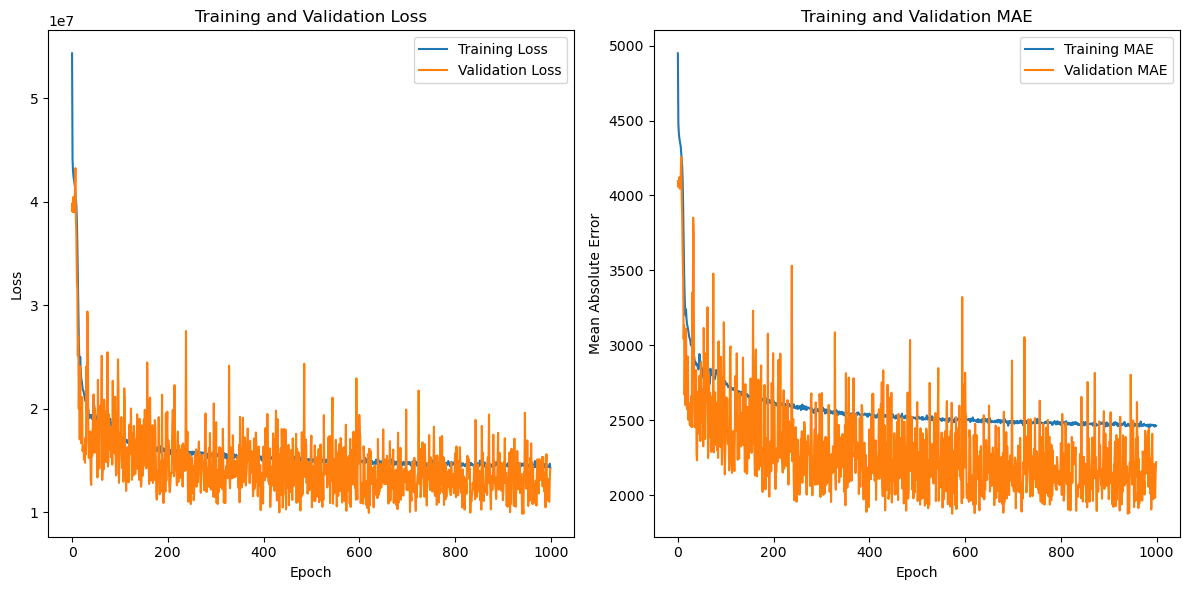

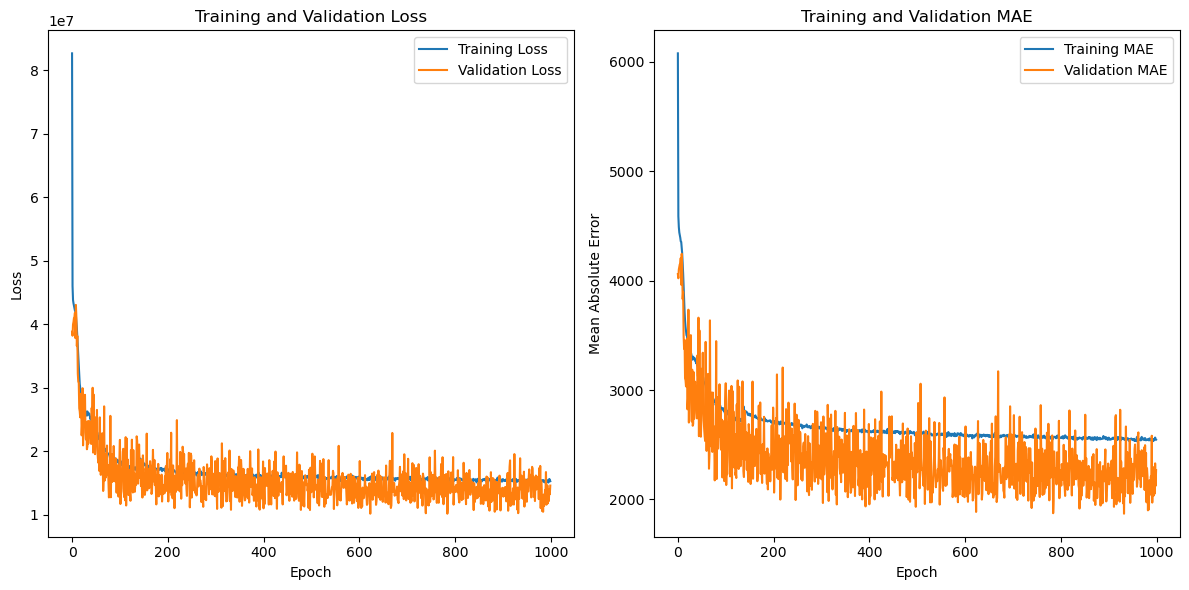

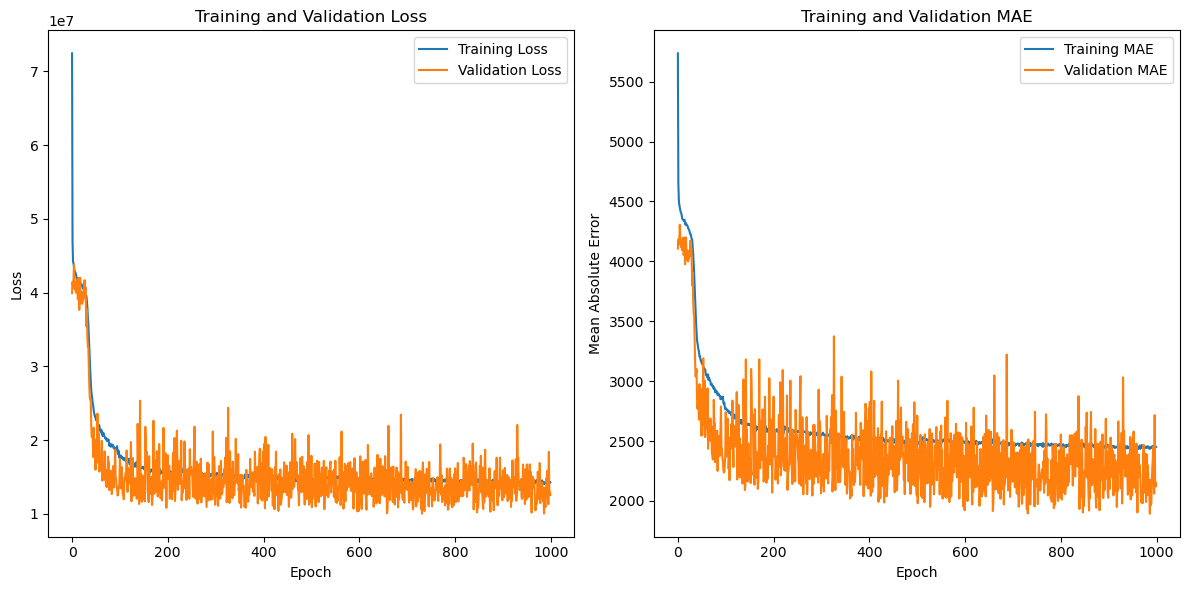

In [11]:
configurations_batch_size = [
    {'hidden_layers': [16, 16], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.0005, 'batch_size': 16},
    {'hidden_layers': [16, 16], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.0005, 'batch_size': 32},
    {'hidden_layers': [16, 16], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.0005, 'batch_size': 64}
]
for config in configurations_batch_size:
    model = build_model(input_dim, config['hidden_layers'], config['activation'], config['dropout_rate'])
    history = train_model(model, X_train, y_train, X_val, y_val, config['learning_rate'], epochs, config['batch_size'])
    plot_training_history(history)

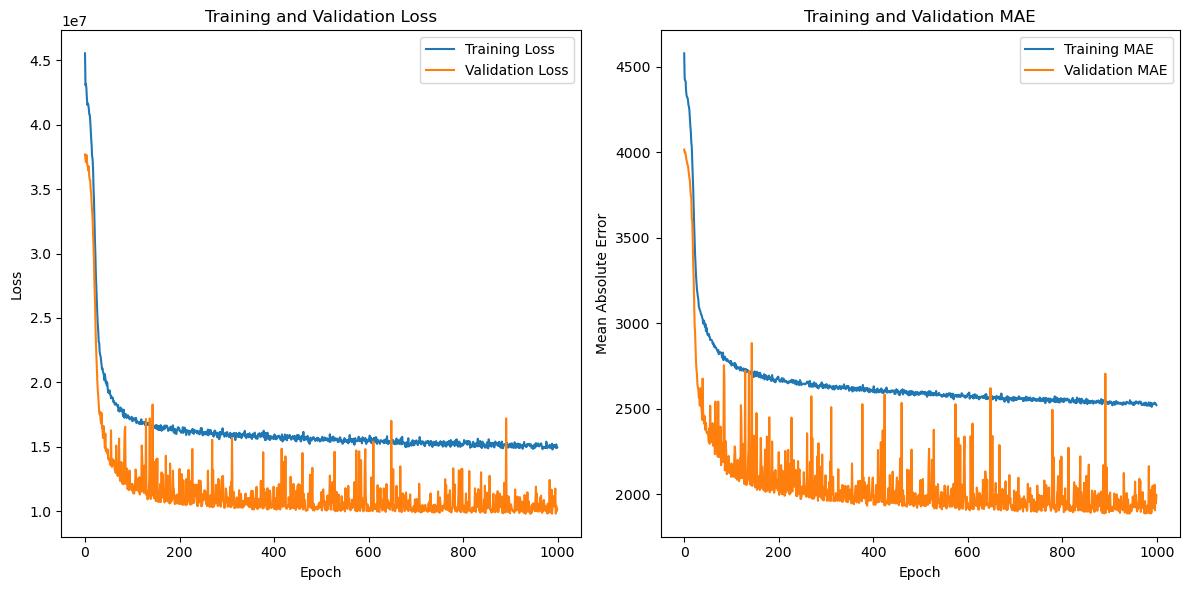

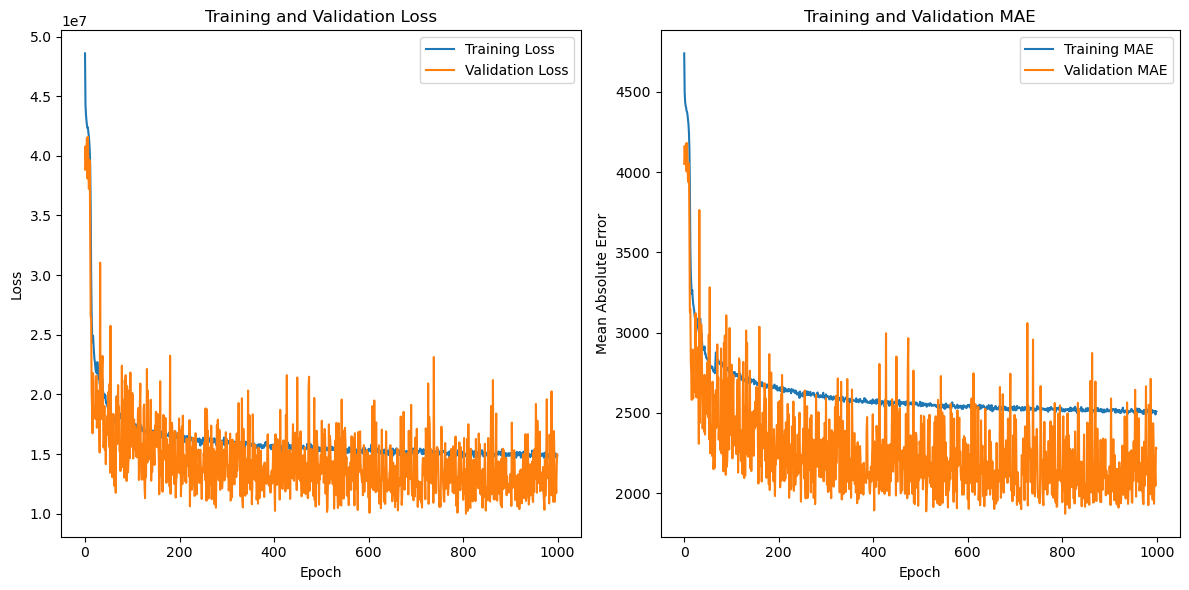

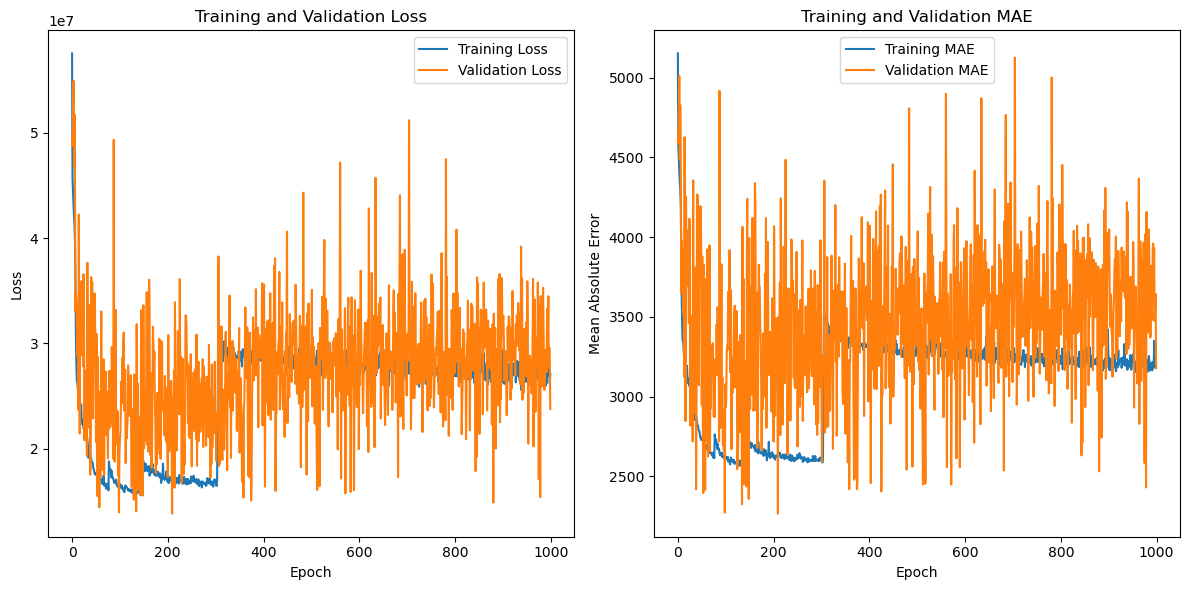

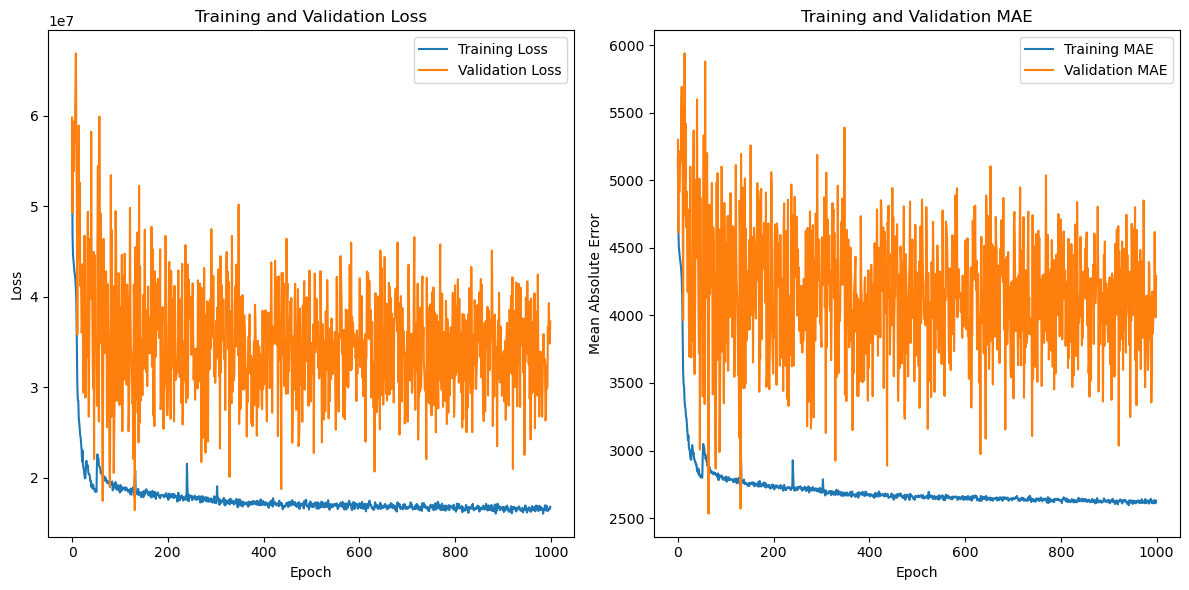

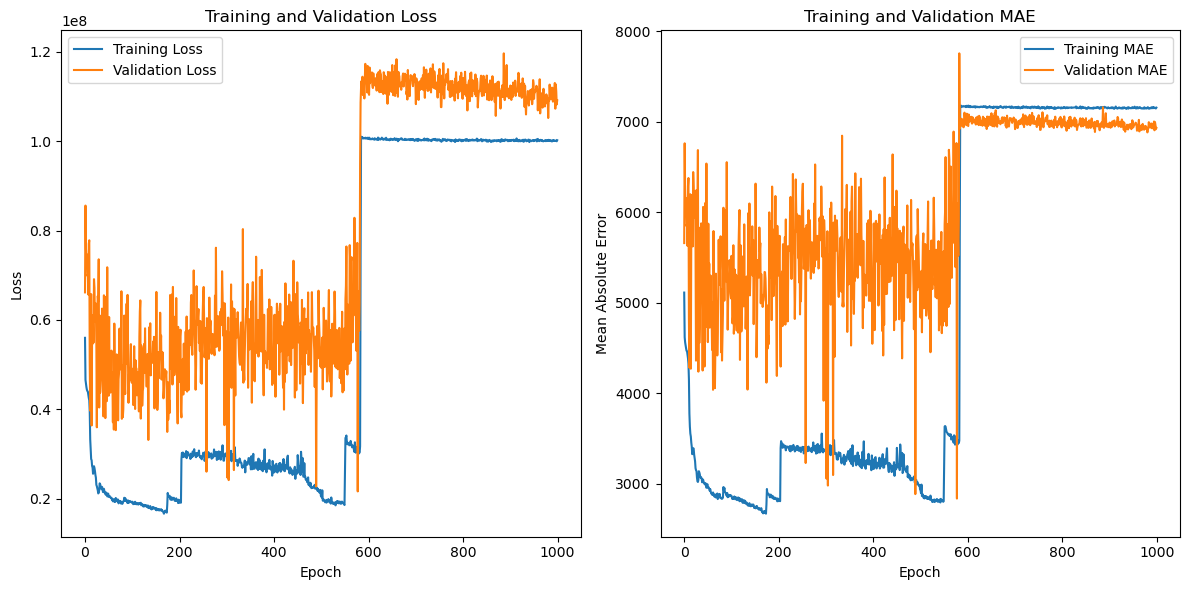

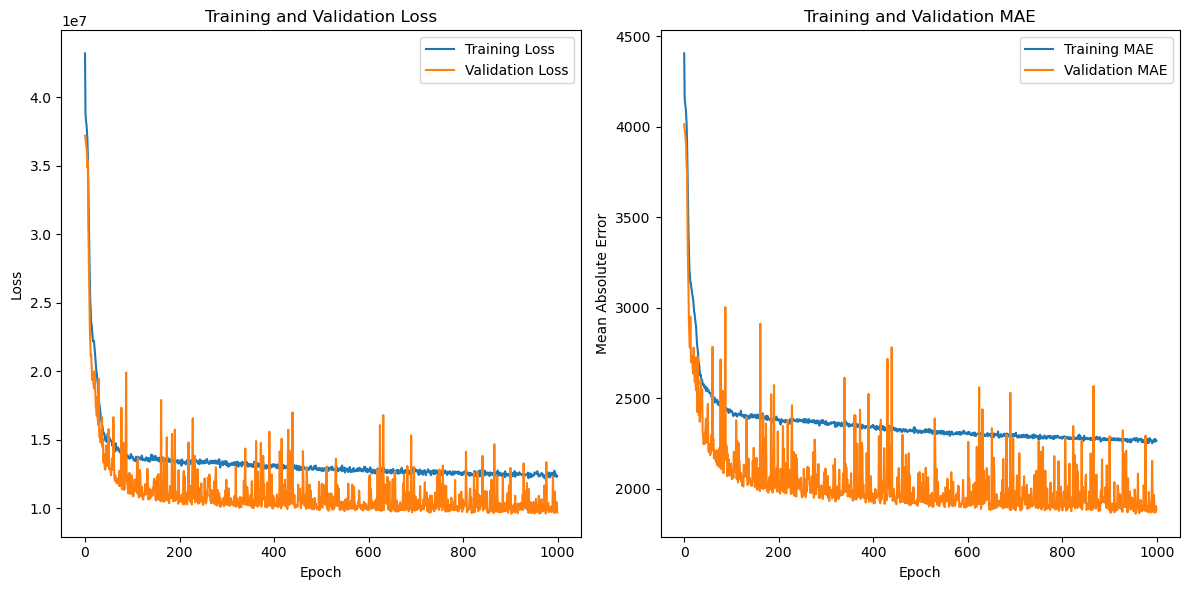

KeyboardInterrupt: 

2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - loss: 16309801.0000 - mean_absolute_error: 2544.2751 - val_loss: 11161218.0000 - val_mean_absolute_error: 2035.6500
Epoch 80/100
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - loss: 15194963.0000 - mean_absolute_error: 2493.6567 - val_loss: 11736466.0000 - val_mean_absolute_error: 2137.7383
Epoch 81/100
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - loss: 14734073.0000 - mean_absolute_error: 2481.4949 - val_loss: 12277067.0000 - val_mean_absolute_error: 2087.4790
Epoch 82/100
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - loss: 16647421.0000 - mean_absolute_error: 2556.3064 - val_loss: 13566576.0000 - val_mean_absolute_error: 2167.2727
Epoch 83/100
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - loss: 16123662.0000 - mean_absolute_error: 2540.2317 - val_loss: 15736318.0000 - val_mean_absolute_error: 2460.5232
Epoch 84/100
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - loss: 16036215.0000 - mean_absolute_error: 2530.7273 - val_loss: 14745392

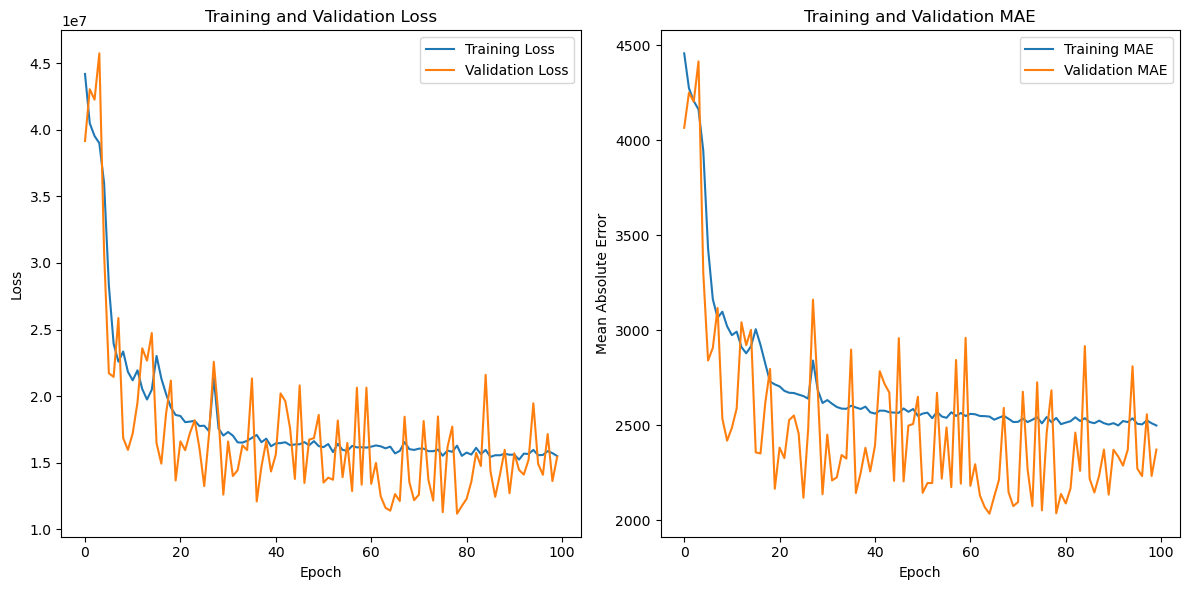

In [12]:
configurations_layers_width = [
    {'hidden_layers': [16], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 32},
    {'hidden_layers': [16, 16], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 32},
    {'hidden_layers': [16, 16, 16], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 32},
    {'hidden_layers': [16, 16, 16, 16], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 32},
    {'hidden_layers': [16, 16, 16, 16, 16], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 32},
    {'hidden_layers': [64], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 32},
    {'hidden_layers': [64, 64], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 32},
    {'hidden_layers': [64, 64, 64], 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.001, 'batch_size': 32}
]
for config in configurations_layers_width:
    model = build_model(input_dim, config['hidden_layers'], config['activation'], config['dropout_rate'])
    history = train_model(model, X_train, y_train, X_val, y_val, config['learning_rate'], epochs, config['batch_size'])
    plot_training_history(history)

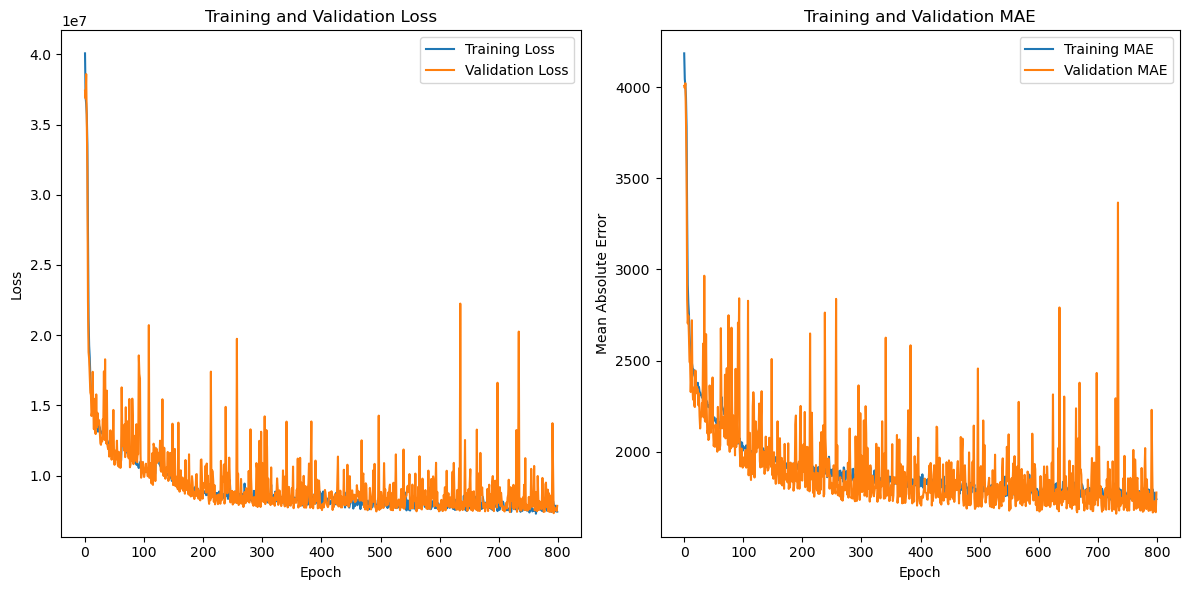

Final validation MAE: 1777.186279296875


In [10]:
config = {'hidden_layers': [64,64], 'activation': 'relu', 'dropout_rate': 0, 'learning_rate': 0.001, 'batch_size': 32}
model = build_model(input_dim, config['hidden_layers'], config['activation'], config['dropout_rate'])
history = train_model(model, X_train, y_train, X_val, y_val, config['learning_rate'], 800, config['batch_size'])
plot_training_history(history)
last_val_mae = history.history['val_mean_absolute_error'][-1]
print(f"Final validation MAE: {last_val_mae}")

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instea

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instea

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instea

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Best score=8565836.0000
Best parameters:
{'hidden_layers': '16-16', 'activation': 'relu', 'dropout_rate': 0.0, 'learning_rate': 0.00592476744831115, 'batch_size': 128}


<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

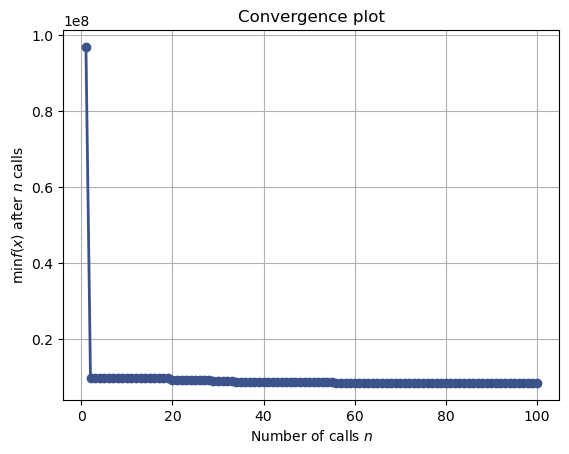

In [18]:
X = df.drop(['price', 'model', 'Manufacturer'], axis=1)

y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from skopt.space import Real, Categorical, Integer

space = [
    Categorical(['16', '32', '16-16', '32-32'], name='hidden_layers'),
    Categorical(['relu', 'tanh', 'sigmoid'], name='activation'),
    Real(0.0, 0.3, name='dropout_rate'),
    Real(0.0001, 0.01, prior='log-uniform', name='learning_rate'),
    Categorical([32, 64, 128, 256], name='batch_size')
]


from skopt.utils import use_named_args

@use_named_args(space)
def objective(hidden_layers, activation, dropout_rate, learning_rate, batch_size):
    hidden_layers = [int(n) for n in hidden_layers.split('-')] 
    model = Sequential()
    for i, layer_size in enumerate(hidden_layers):
        if i == 0:
            model.add(Dense(layer_size, activation=activation, input_shape=(X_train.shape[1],)))
        else:
            model.add(Dense(layer_size, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    result = model.fit(X_train, y_train, epochs=200, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))
    validation_loss = np.min(result.history['val_loss'])
    return validation_loss


from skopt import gp_minimize

result = gp_minimize(objective, space, n_calls=100, random_state=0)

print("Best score=%.4f" % result.fun)
print("Best parameters:")
best_params = {dimension.name: result.x[i] for i, dimension in enumerate(space)}
print(best_params)

from skopt.plots import plot_convergence
plot_convergence(result)



D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



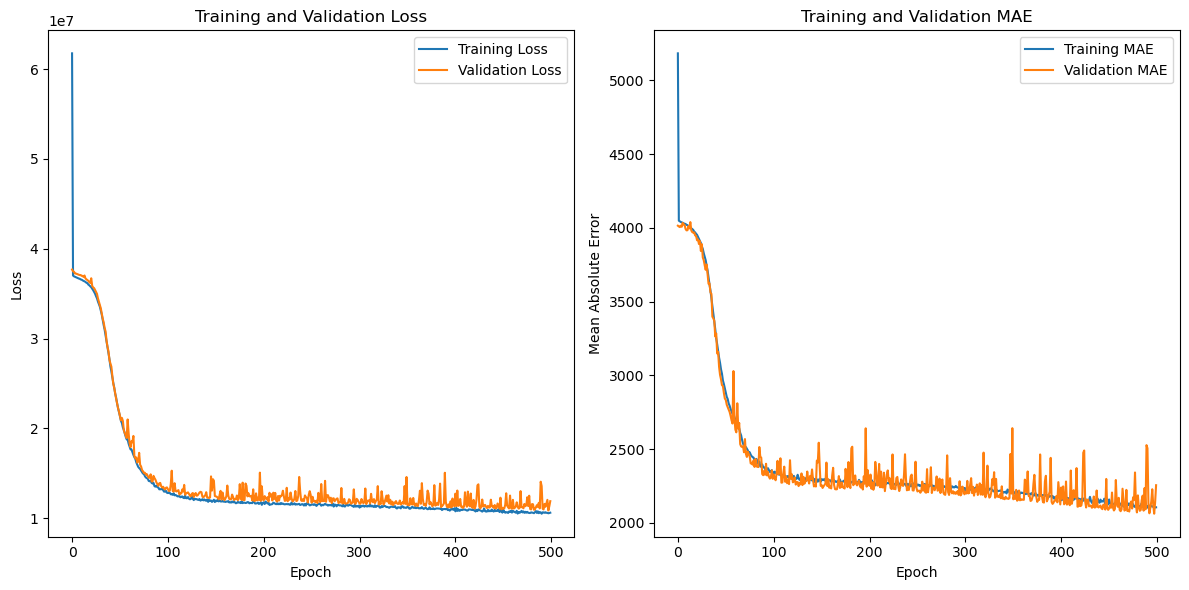

Final validation MAE: 2255.030029296875


In [13]:
config = {'hidden_layers': [16,16], 'activation': 'relu', 'dropout_rate': 0, 'learning_rate': 0.0005, 'batch_size': 128}
model = build_model(input_dim, config['hidden_layers'], config['activation'], config['dropout_rate'])
history = train_model(model, X_train, y_train, X_val, y_val, config['learning_rate'], 500, config['batch_size'])
plot_training_history(history)
last_val_mae = history.history['val_mean_absolute_error'][-1]
print(f"Final validation MAE: {last_val_mae}")